## 1.Perkenalan

Nama : Adhy Arya Hendrata  
Dataset : [BANK MARKETING](./bank.csv)   
Website : [Huggingface](https://huggingface.co/spaces/adhyarya51/PrediksiDeposit)

Object : Deployment supervised data dengan memprediksi pola nasabah.

### Problem Statement : 

Penentuan prediksi model ditentukan dengan analisa untuk mengetahui pola klien.

### Latar Belakang : 

Data yang berasal dari salah satu institusi bank asal portugis, ingin membuat sebuah kampanye yang berdasarkan dari panggilan telepon. Saya dan tim pemasaran ingin melakukan prediksi terhadap calon nasabah akan melakukan langganan atau tidak dengan menghubungin calon nasabah melalui telepon. Namun tim ingin mengetahui nasabah yang dihubungin akan berpotensi untuk mendaftar/berlangganan deposito, atau tidak. Maka dari itu pemasaran analisis mencoba prediksi dengan model machine learning dengan analisa pola data yang akan membantu tim dalam menentukan strategi. Berikut informasi detail pada variabel yang telah diketahui.

| Column | Description |
| --- | --- |
| age (numeric) | Amount of given credit in NT dollars (includes individual and family/supplementary credit) |
| job | type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student" "blue-collar","self-employed","retired","technician","services") |
| marital |  marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) |
| education(categorical) | "unknown","secondary","primary","tertiary" |
| default | has credit in default? (binary: "yes","no") |
| balance | average yearly balance, in euros (numeric) |
| housing | has housing loan? (binary: "yes","no") |
| load | has personal loan? (binary: "yes","no") |
| contact | has personal loan? (binary: "yes","no") |
| day | last contact day of the month (numeric) |
| month | last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") |
| duration | last contact duration, in seconds (numeric) |
| campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact)|
| pdays| number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)|
| previous | number of contacts performed before this campaign and for this client (numeric)|
| poutcome | outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")|
| target y, pada kasus ini yaitu "deposit" | - has the client subscribed a term deposit? (binary: "yes","no")|


## 2.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import phik
import plotly.express as px

# import FE 

from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# import model 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


## 3.Data Loading

Data diambil dari website Kaggle yang diambil, dan download serta dimasukan kedalam `Data_Original`

In [2]:
# load dataset 
Data_Original = pd.read_csv('bank.csv')

# duplikasi dataset 
df = Data_Original.copy()

In [3]:
# melihat kolom 
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
# melihat 10 data pertama 
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [5]:
# melihat 10 data terakhir 
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
# melihat nununique setiap kolom 
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [7]:
# melihat kolom day
df['day'].value_counts()

day
20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: count, dtype: int64

In [8]:
# melihat kolom deposit
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [9]:
# melihat kolom kontak
df['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [10]:
# melihat kolom poutcome
df['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [11]:
# melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [12]:
# memeriksa missing value 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [13]:
# melihat kolom 
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [14]:
# memeriksa statistik data 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [15]:
# mengetahui bentuk data 
df.shape

(11162, 17)

In [16]:
# membuat kolom numeric dan categoric
numeric = []
categoric = []

# melakukan pemisahan numeric dan kategori 
for i in df.columns.tolist():
    if df[i].nunique()>12:
        numeric.append(i)
    else:
        categoric.append(i)

In [17]:
# melihat kolom numeric
numeric

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [18]:
# melihat kolom kategori
categoric

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [19]:
# membuat variabel baru 
df_cat = df[['job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome',
    'deposit']]
# looping categoric
for i in df_cat.columns : 
    cat = df[i].unique()
    print(i, ':', cat)

job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital : ['married' 'single' 'divorced']
education : ['secondary' 'tertiary' 'primary' 'unknown']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'other' 'failure' 'success']
deposit : ['yes' 'no']


data menunjukan untuk job ada yang tidak sesuai dengan data lain, saya akan melakukan penyesuaian typo. 

In [20]:
# handling typo 
df['job'] = df['job'].str.replace('.','')

In [21]:
# memeriksa kembali unique value job
df['job'].unique()

array(['admin', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

**Hasil observasi data :**

- Data berjumlah 11162 baris, dan 17 kolom 
- Diketahui tidak memiliki missing value 
- Data memiliki integer 7 dan 10 objek, atau bisa disimpulkan ada 7 data numerik
dan 10 categorical
- Ditemukan kedua kolom berupa data `unknown` akan ditindak lanjutin, setelah dilakukan observasi unique value pada kolom **contact**, dan **poutcome**. Hasil tidak dapat dikatakan aneh, namun jumlah unknown akan tetap diproses,
- Target data y `deposit` terhitung balance dengan **yes** : 5289 , **no** : 5873

## 4.Exploratory Data Analysis (EDA)

Tahap selanjutnya melakukan EDA, eksplorasi data yang dilakukan akan melihat secara mendasar sebaran suatu data.

### Sebaran Data Numerical

In [22]:
# menampilkan kesimpulan
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Saya menggunakan function `.describe()` sebagai observasi data awal. Beberapa hasil observasi yang saya temukan bahwa : 

- rata - rata umur pada data adalah 41 tahun dengan range dari umur 18 - 95 tahun. apabila dilihat deskripsi dari mean , dan std maka nilai std yang kecil mengindikasi bahwa pengelompokan mendekati rata - rata. 

- rata - rata balance yang dimiliki klien adalah 1528.538, dengan range minimum -6847, dan maksimum sebesar 81204 

- rata - rata pemasaran menghubungin dalam kurun waktu 15.6 hari atau 16 hari, dengan jarak hari dari 1 - 31 hari, atau sebulan. 

- rata - rata pemasaran berhubungan kontak dalam durasi **detik** adalah 371 detik, min 2, dan max 3881 detik. 

- rata - rata pemasaran upaya melakukan kontak terhadap klien adalah 2.508 dengan range min sebesar 1, dan max adalah 63 

- rata - rata pemasaran menghubungin klien adalah 51, dan bernilai -1 untuk min, dan max 854. 

- rata - rata nomor kontak sebelum dihubungin oleh pemasaran adalah 1 klien sebelum melanjutkan menghubungin klient selanjutnya. 

### Sebaran Data berdasarkan Pekerjaan, Pernikahan, dan Umur

In [23]:
# melakukan grouping 'job' dan 'marital', menghitung rata2 'age'
df_grouped = df.groupby(['job', 'marital'])['age'].mean().reset_index()

# membuat bar chart
fig = px.bar(df_grouped, x='job', y='age', color='marital',
             title='rata - rata umur terhadap Pekerjaan, dan Pernikahan',
             labels={'job': 'Pekerjaan', 'age': 'rata - rata umur'})

# menentukan layout
fig.update_layout(xaxis_tickangle=30, xaxis_title='Job', yaxis_title='Average Age')
fig.update_traces(marker_line_color='black', marker_line_width=1.5)  # Adding borders to bars

# menampilkan bar chart
fig.show()


c:\Users\adhy arya\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


Hasil observasi data : 
- pada sebaran data, bahwa mayoritas pensiun lebih banyak, dibagi menjadi tiga, `menikah`, `single`, dan `cerai`. Diketahui rata - rata umurnya adalah **66**,**65**, dan **58**. 
- sedangkan, data terendah pada murid, diketahui rata - rata umurnya dari `menikah`, `single`, dan `cerai` yaitu : **37**,**31**, dan **25**

### Sebaran Data Klasifikasi

#### Tabel Klasifikasi 

In [24]:
# memanggil dataframe
df = pd.DataFrame(df)

# membuat kelas
Tingkatan = []

# membentuk looping
for i in df['age']:
    if i >= 5 and i < 11:
        Tingkatan.append('Anak - anak')
    elif i >= 12 and i < 25:
        Tingkatan.append('Remaja')
    elif i >= 26 and i < 45:
        Tingkatan.append('Dewasa')
    else:
        Tingkatan.append('Lansia')

df['Klasifikasi'] = Tingkatan

# pemanggilan df
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Klasifikasi
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,Lansia
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,Lansia
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,Dewasa
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,Lansia
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,Lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,Dewasa
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,Dewasa
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,Dewasa
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,Dewasa


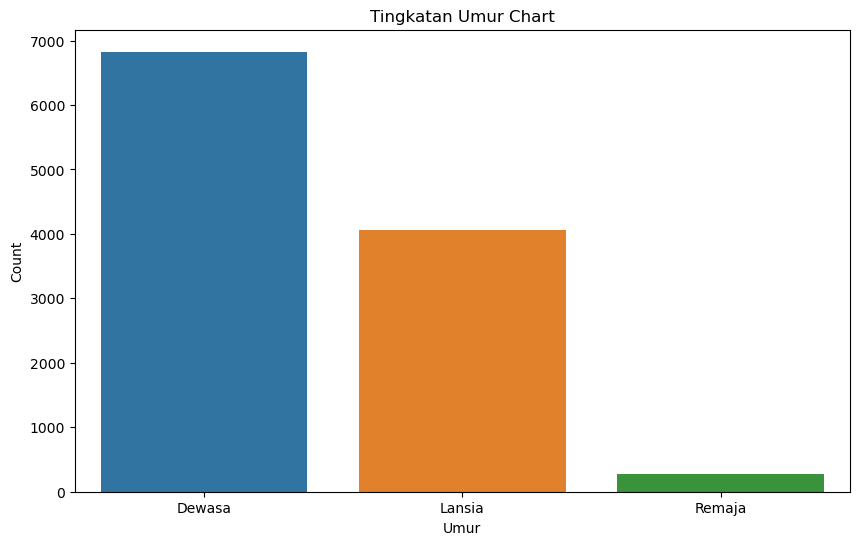

In [25]:
# membuat bar chart
calculate = df.groupby('Klasifikasi')['Klasifikasi'].count().sort_values(ascending=False)

# melakukan plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Tingkatan Umur Chart')
plt.xlabel('Umur')
plt.ylabel('Count')
plt.show()

Observasi : 

- Keseluruhan data dilakukan klasifikasi dan ditemukan bahwa ada tiga kelas umur yaitu : `Dewasa`, `Lansia`, `Remaja` 
- Mayoritas bar chart menunjukan `Dewasa` sebagai nasabah terbanyak, `Lansia`, dan `Remaja`. 

### Klasifikasi Umur, Pekerjaan terhadap Saldo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


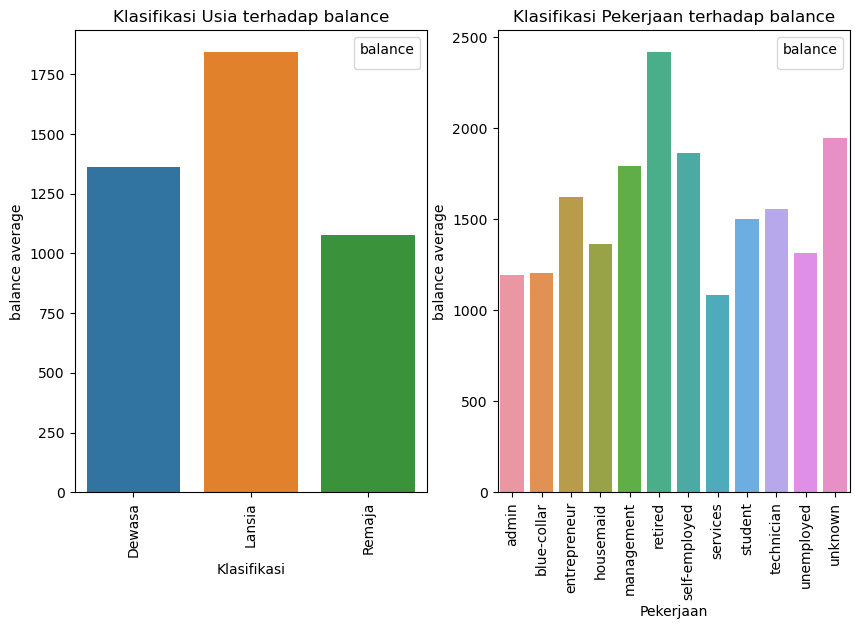

In [26]:
# Create Bar chart

calculate_klasifikasi = df.groupby(['Klasifikasi'])['balance'].mean().reset_index()
calculate_pekerjaan = df.groupby(['job'])['balance'].mean().reset_index()
# plot utama
plt.figure(figsize=(10, 6))
# membuat sub plot
plt.subplot(1,2,1)
sns.barplot(data=calculate_klasifikasi, x='Klasifikasi', y='balance')
plt.title('Klasifikasi Usia terhadap balance')
plt.xlabel('Klasifikasi')
plt.ylabel('balance average')
plt.legend(title='balance')
plt.xticks(rotation=90)

# membuat sub plot
plt.subplot(1,2,2)
sns.barplot(data=calculate_pekerjaan, x='job', y='balance')
plt.title('Klasifikasi Pekerjaan terhadap balance')
plt.xlabel('Pekerjaan')
plt.ylabel('balance average')
plt.legend(title='balance')
plt.xticks(rotation=90)

# menampilkan chart
plt.show()

Hasil : 

- dalam klasifikasi usia diketahui Lansia memiliki rata - rata saldo tertinggi, dibandingkan Dewasa, dan Remaja
- untuk pekerjaan ditemukan nasabah pensiunan memiliki saldo tertinggi rata - rata sebesar 2000 - 2500, serta rata - rata saldo terendah adalah pekerjaan services. 

### Data Grafik Pernikahan

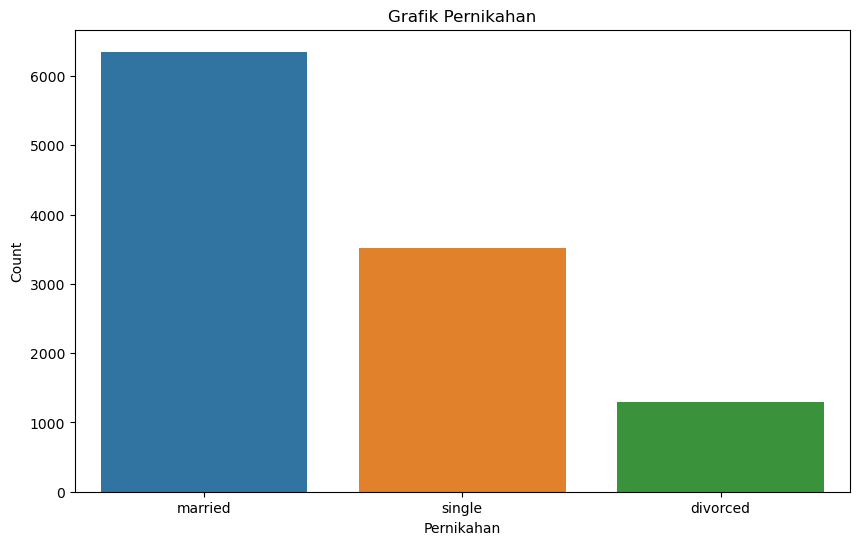

In [27]:
# membuat Bar chart
calculate = df.groupby('marital')['marital'].count().sort_values(ascending=False)
# membentuk grafik
plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Grafik Pernikahan')
plt.xlabel('Pernikahan')
plt.ylabel('Count')
# menampilkan plot
plt.show()

Hasil : 

- jumlah nasabah yang `menikah` lebih dari **6000**, dan `single` antara **3000** - **4000**, dan yang `bercerai` antara **1000**. 

### Sebaran Pendidikan 

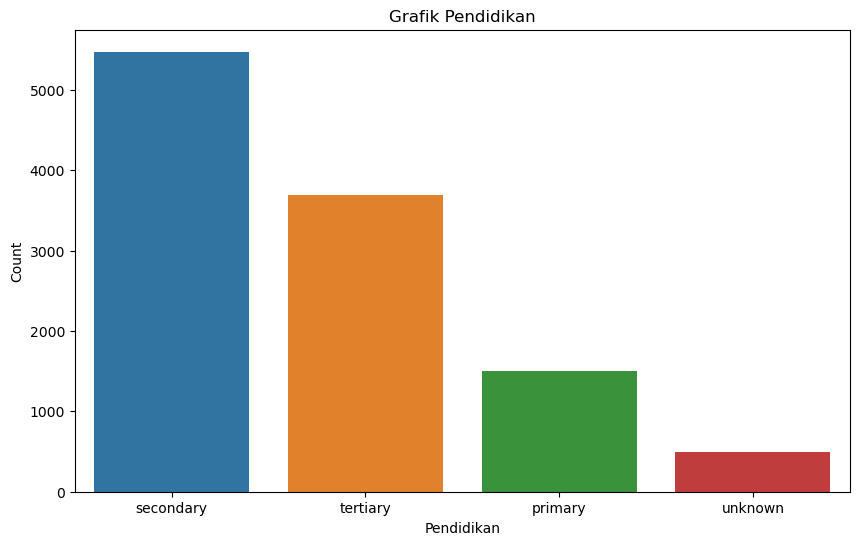

In [28]:
# membuat Bar chart
calculate = df.groupby('education')['education'].count().sort_values(ascending=False)
# membentuk grafik
plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Grafik Pendidikan')
plt.xlabel('Pendidikan')
plt.ylabel('Count')
# menampilkan plot
plt.show()

Hasil : 

- dalam sebaran menunjukan mayoritas data pendidikan berurut dari secondary, tertiary, primary, dan unknown.

### Sebaran Kontak 

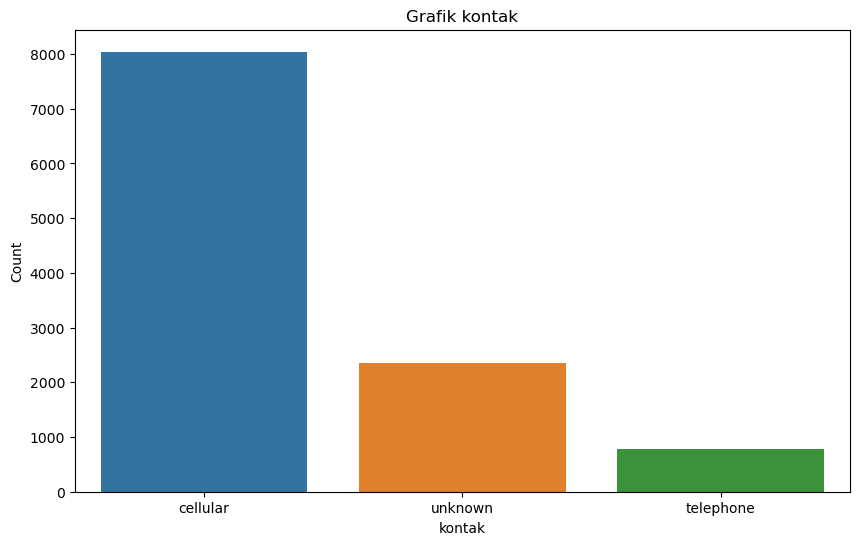

In [29]:
# kalkulasi grup
calculate = df.groupby('contact')['contact'].count().sort_values(ascending=False)
# membentuk plot
plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Grafik kontak')
plt.xlabel('kontak')
plt.ylabel('Count')
# menampilkan plot
plt.show()

Hasil : 

- Sebaran Kontak menunjukan mayoritas menggunakan cellular dan telephone, serta beberapa belum diketahui. 

### Sebaran Balance dan Umur

In [30]:
# Membuat scatter plot PURCHASES dengan CREDIT LIMIT
fig = px.scatter(df, x='balance', y='age', hover_data=['job'], title='Balance dan Umur')
fig.update_layout(xaxis_title='Saldo', yaxis_title='Umur')
# menampilkan scatter
fig.show()

Hasil : 

- Sebaran menggunakan scatter plot menunjukan mayoritas saldo `10000`, dan umur `74`
- dengan umur tertinggi diumur `95` `pensiunan` saldonya sebesar `2282`,
- saldo terbanyak sebesar `81000`, pensiunan dan umur `84`
- dan ada saldo menyampai **minus** pada umur `49`, pekerjaan `manajement`. 

### Data perbandingan Hutang, dan Cicilan Rumah.

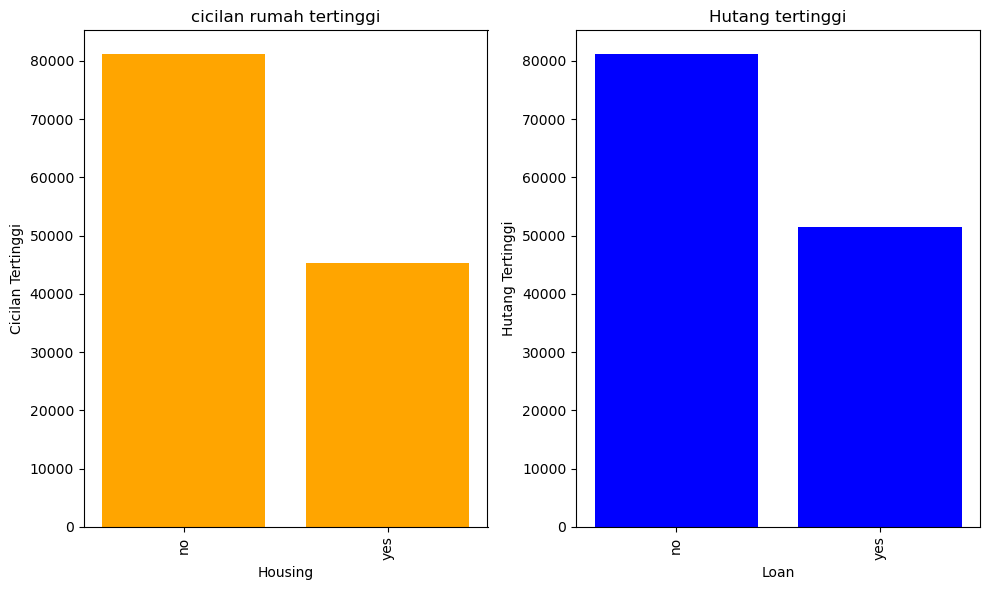

In [31]:
# Hitung Cicilan Rumah, dan hutang
housing_balance = df.groupby('housing')['balance'].max()
loan_balance = df.groupby('loan')['balance'].max()

# Plot distribusi cicilan rumah dan hutang dalam satu grafik
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(housing_balance.index, housing_balance.values, color='orange')
plt.title('cicilan rumah tertinggi')
plt.xlabel('Housing')
plt.ylabel('Cicilan Tertinggi')

# Menambahkan label pada sumbu x
plt.xticks(rotation=90)  # Rotasi label agar lebih jelas
plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih


plt.subplot(1, 2, 2)
plt.bar(loan_balance.index, loan_balance.values, color='blue')
plt.title('Hutang tertinggi')
plt.xlabel('Loan')
plt.ylabel('Hutang Tertinggi')

# Menambahkan label pada sumbu x
plt.xticks(rotation=90)  # Rotasi label agar lebih jelas
plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih

Hasil : 

- dalam dua grafik menunjukan mayoritas tidak memiliki hutang, dan cicilan rumah
- mayoritas nasabah memiliki hutang dan cicilan disekitaran 40000 - 50000. 

### Data sebaran Deposit

In [32]:
# kalkulasi total deposit
calculate = df['deposit'].value_counts()
# membentuk piechart
fig = px.pie(values=calculate.values, names=calculate.index, 
             title='Distribusi Deposit')
# memanggil pie chart
fig.show()

- Distribusi deposit terbagi rata dengan ditanya melakukan deposit sebesar 47%, dan tidak sebenyak 52.6%

## 5.Feature Engineering

Proses ini saya akan melakukan beberapa langkah yaitu : 

1. Split antara X dan y 
2. Split antara Train - set, dan Test - set
3. Missing Value Handling 
4. Handling Outlier
5. Feature Selection
6. Split Numerical dan Categorical
7. Check Cardinality
8. Modeling Pipeline

Dalam point **6** dan **7** saya melakukan split `numerical` dan `categorical`, hanya bertujuan untuk melihat `check cardinality`. Tetapi, pada `modeling pipeline` saya tetap menggunakan `X_Features` dari hasil proses `Feature_Selection`.

### 5.1 Split antara X dan y 

In [33]:
# split X dan y 

X = df.drop(['deposit', 'Klasifikasi'], axis=1)
y = df['deposit']

# menampilkan x 
X.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


In [34]:
# menampilkan kolom
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [35]:
# menampilkan y 
y.head(5)

0    yes
1    yes
2    yes
3    yes
4    yes
Name: deposit, dtype: object

Data yang sudah dipisahkan sudah bisa dilakukan proses analisis, pada kasus ini saya menggunakan keseluruhan sebagai X dan target y adalah ```Deposit```, dan kolom ```Klasifikasi``` karena sudah tidak dibutuhkan dalam pengolahan.

### 5.2 Split antara Train - set, dan Test - set 

Split pembagian menjadi train set dan test set sebesar : 
- train set : 80%  
- test set : 20%.

In [36]:
# split antara train dan test dengan 'train_test_split'
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=17)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

# tampilkan hasil split X_train
X_train.head()

Train Size : (8929, 16)
Test Size : (2233, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3299,26,admin,single,tertiary,no,760,yes,no,cellular,4,mar,456,2,281,5,success
2273,34,admin,single,secondary,no,303,no,no,cellular,4,jun,282,3,126,3,failure
4191,27,admin,single,secondary,no,18188,yes,no,unknown,12,jun,541,17,-1,0,unknown
4718,21,technician,single,unknown,no,360,no,no,cellular,26,may,131,2,-1,0,unknown
4001,31,housemaid,married,secondary,no,243,yes,no,cellular,23,sep,305,2,842,1,failure


In [37]:
# mengecheck unique value
X_train.nunique()

age            75
job            12
marital         3
education       4
default         2
balance      3422
housing         2
loan            2
contact         3
day            31
month          12
duration     1354
campaign       32
pdays         443
previous       32
poutcome        4
dtype: int64

Melakukan pemisahaan menjadi numerical dan categori, untuk memudahkan dalam melakukan handling outlier. asumsi nununique > 12 adalah numeric.

In [38]:
# mempersiapkan kolom numerical, dan categorical
numerical = []
categorical = []

# looping pemanggilan
for i in X_train:
   if X_train[i].nunique()>12:
       numerical.append(i)
   else:
       categorical.append(i)
       
print(f'numerical column : {numerical}')
print(f'categorical column : {categorical}')

numerical column : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical column : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Melakukan *missing value* handling untuk memastikan data siap diproses.

### 5.3 Missing Value Handling 

In [39]:
# menggabungkan X_train dan y_train untuk memudahkan melakukan pengolahan

df_train = pd.concat([X_train, y_train], axis=1)

# melakukan penghapusan dengan missing values didalam kolom 'price' dari variabel data uji coba

df_train.dropna(subset=['deposit'], inplace= True)

# memperbarui data X_train dan Y_train setelah menghapus missing values 

X_train = df_train.drop(columns='deposit')
y_train = df_train['deposit']

# melakukan penggabungan X_train dan y_train untuk mempermudah melakukan pengolahan 

df_test = pd.concat([X_test, y_test], axis=1)

# menghapus kolom dengan missing value didalam kolom 'price' dari data test

df_test.dropna(subset=['deposit'], inplace=True)

# memperbarui X_test dan y_test setelah menghapus missing values 

X_test = df_test.drop(columns='deposit')
y_test = df_test['deposit']

In [40]:
# memeriksa missing value
X_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [41]:
# memeriksa missing value
X_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [42]:
# memeriksa missing value
y_test.isnull().sum()

0

In [43]:
# memeriksa missing value
y_train.isnull().sum()

0

In [44]:
# mencoba ngeprint shape 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8929, 16)
(8929,)
(2233, 16)
(2233,)


### 5.4 Handling Outlier 

Bagian ini saya melakukan `handle` `outlier`, Kasus ini saya akan menentukan sebaran data. Penentuan dilakukan pembuat kolom khusus `normal`, `skew`, `extreme` selanjutnya saya akan memutuskan untuk menghandle masing - masing persebaran data. Data yang akan dilakukan **drop** apabila tidak lebih dari **5%** dari keseluruhan data. Apabila melebihi **5%** saya akan melakukan proses *capping*.

In [45]:
# mempersiapkan kolom normal, skew, dan extreme
normal = []
skew = []
extreme = []

# looping pemanggilan
for i in numerical:
    skewness = X_train[i].skew()
    if -0.5 < skewness < 0.5:
        normal.append(i)
    elif -1 <= skewness <= -0.5 or 0.5 <= skewness <=1:
        skew.append(i)
    elif skewness < 1 or skewness > 1:
        extreme.append(i)
        
# ngeprint panggilan normal ,skew ,extreme
print('normal:', normal)
print('skew:', skew)
print('extreme skew:', extreme)

normal: ['day']
skew: ['age']
extreme skew: ['balance', 'duration', 'campaign', 'pdays', 'previous']


In [46]:
# penetapan variabel
X_train_winso = X_train
X_test_winso = X_test

In [47]:
# fungsi winsoriser khusus extreme skew
winsoriser_extreme = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=extreme)

X_train_capped = winsoriser_extreme.fit_transform(X_train_winso)
X_test_capped = winsoriser_extreme.transform(X_test_winso)

balance - Before Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



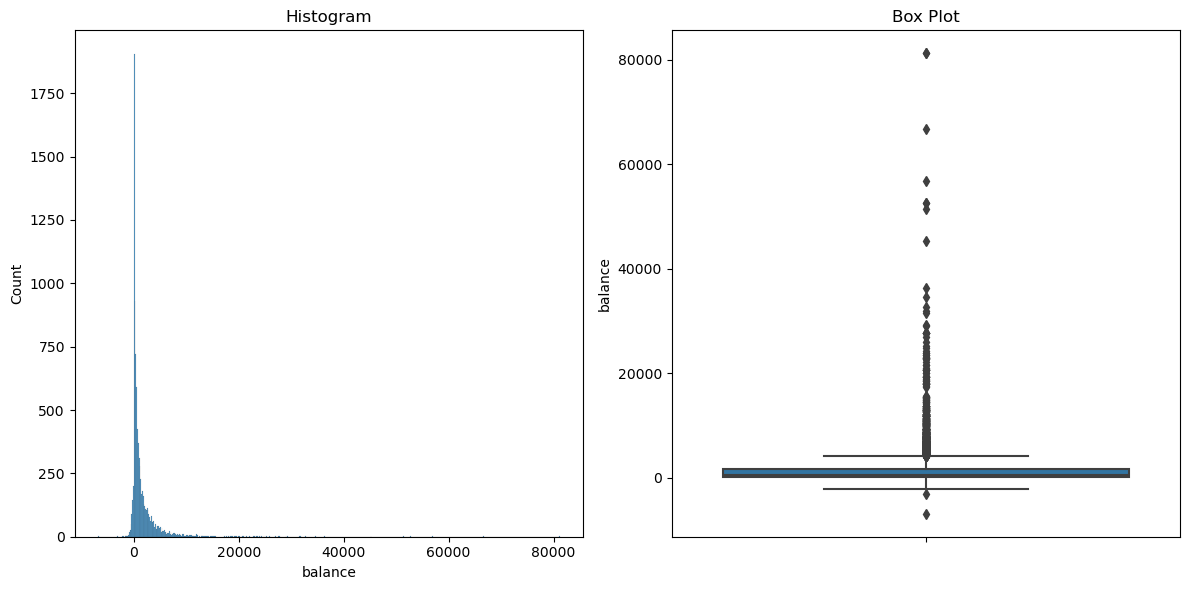


 balance - After Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



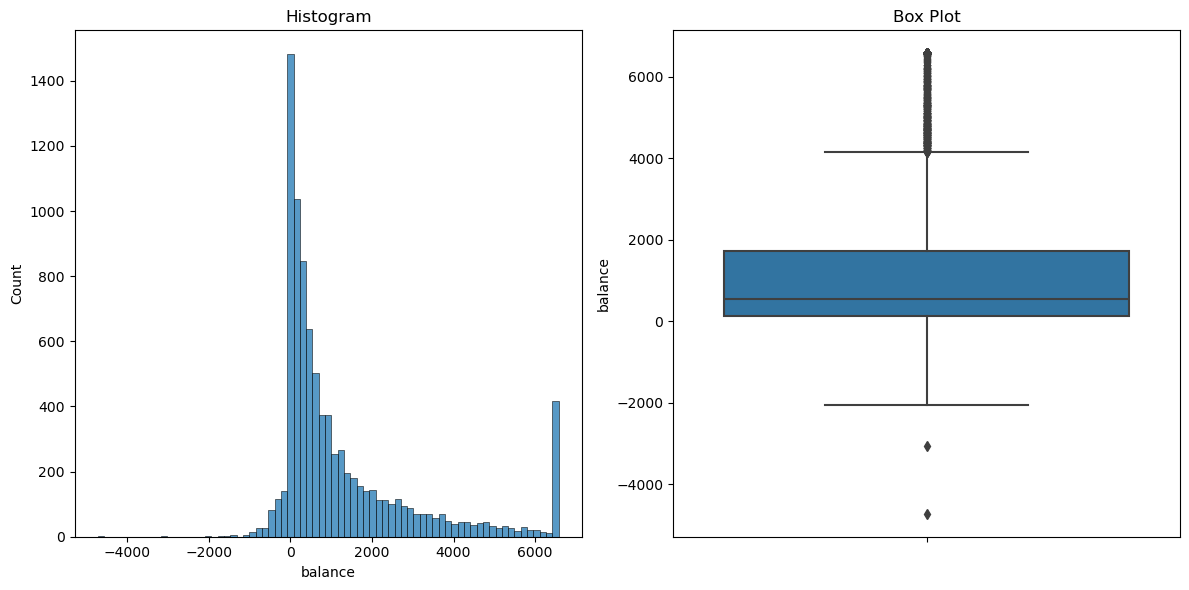

duration - Before Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



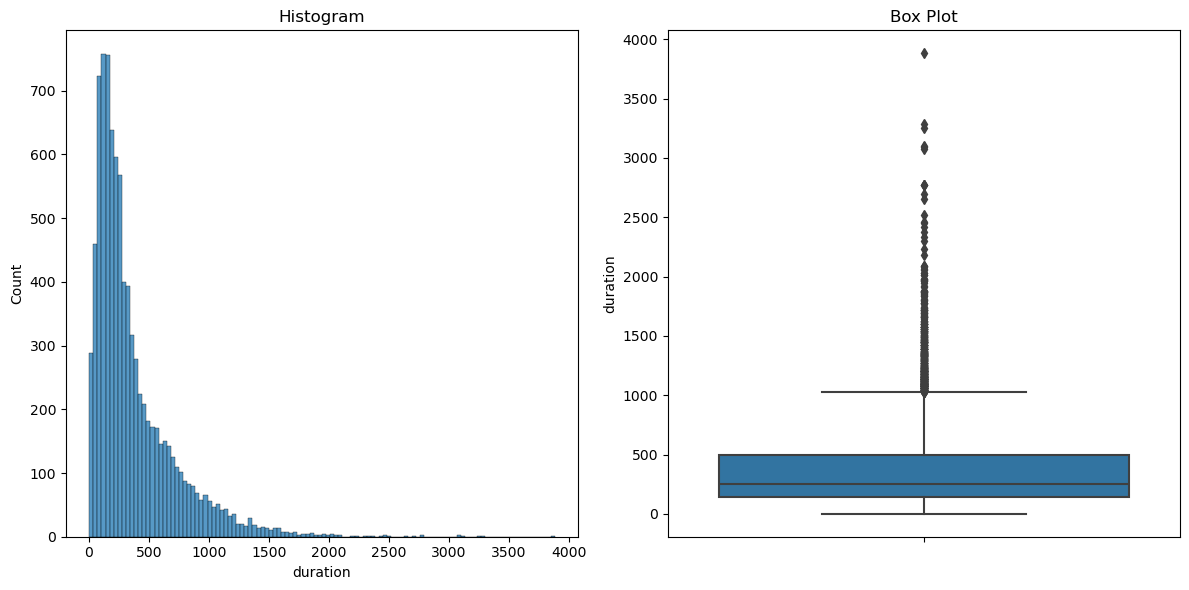


 duration - After Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



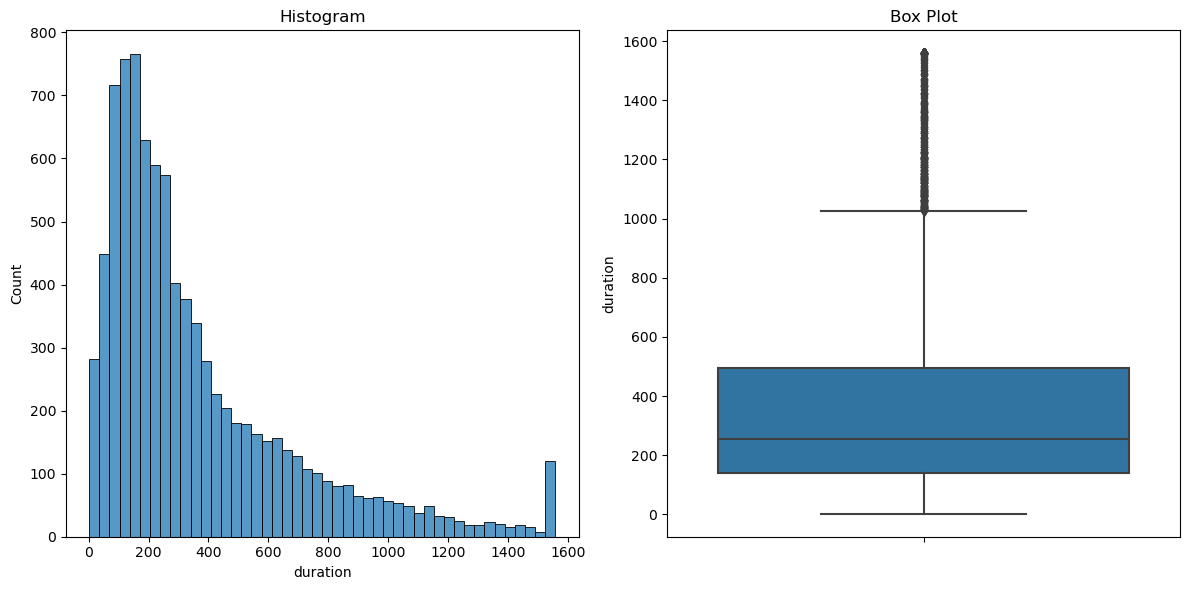

campaign - Before Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



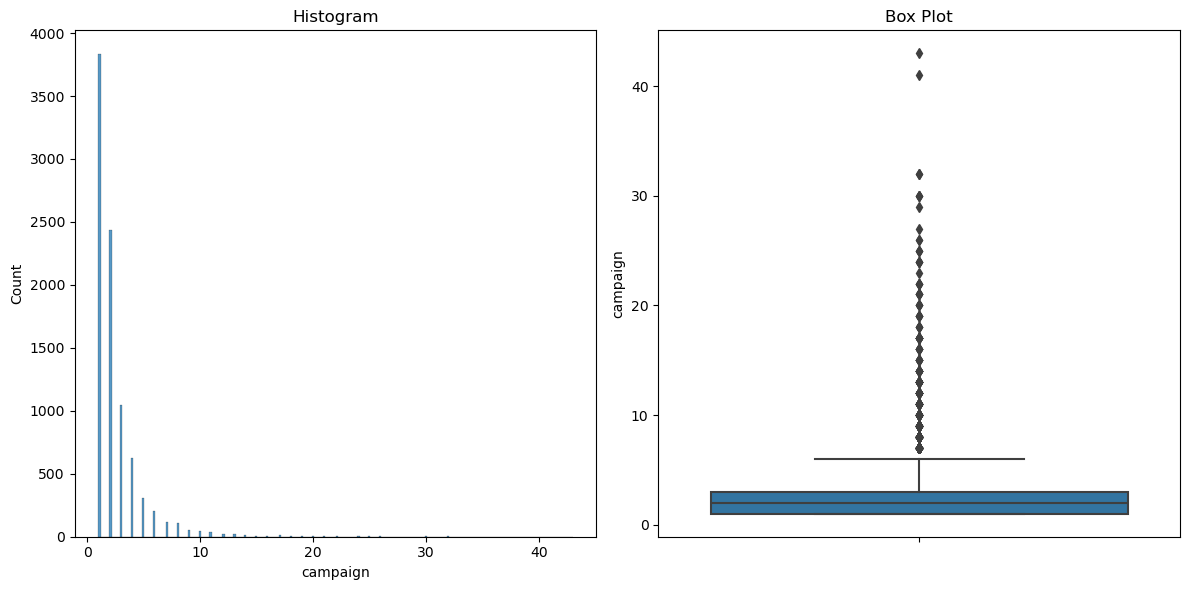


 campaign - After Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



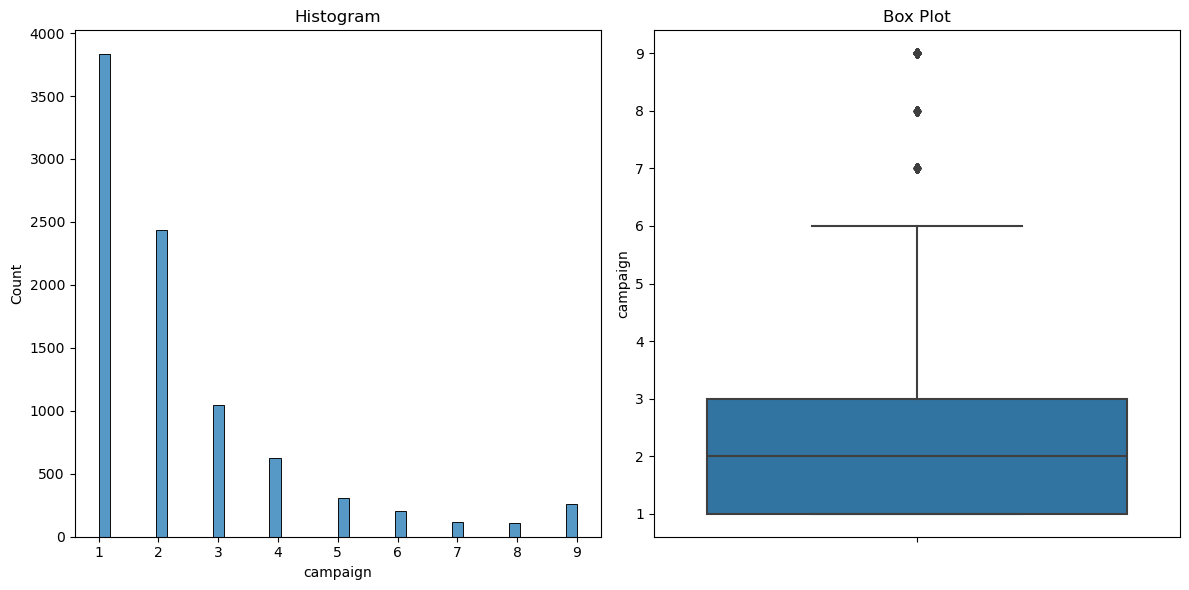

pdays - Before Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



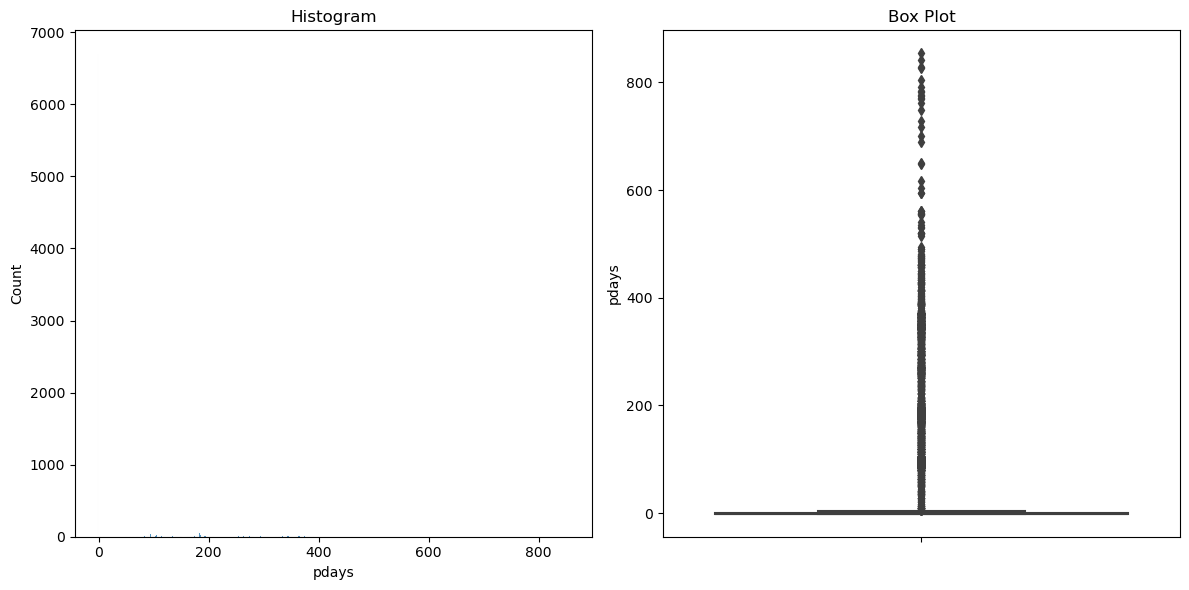


 pdays - After Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



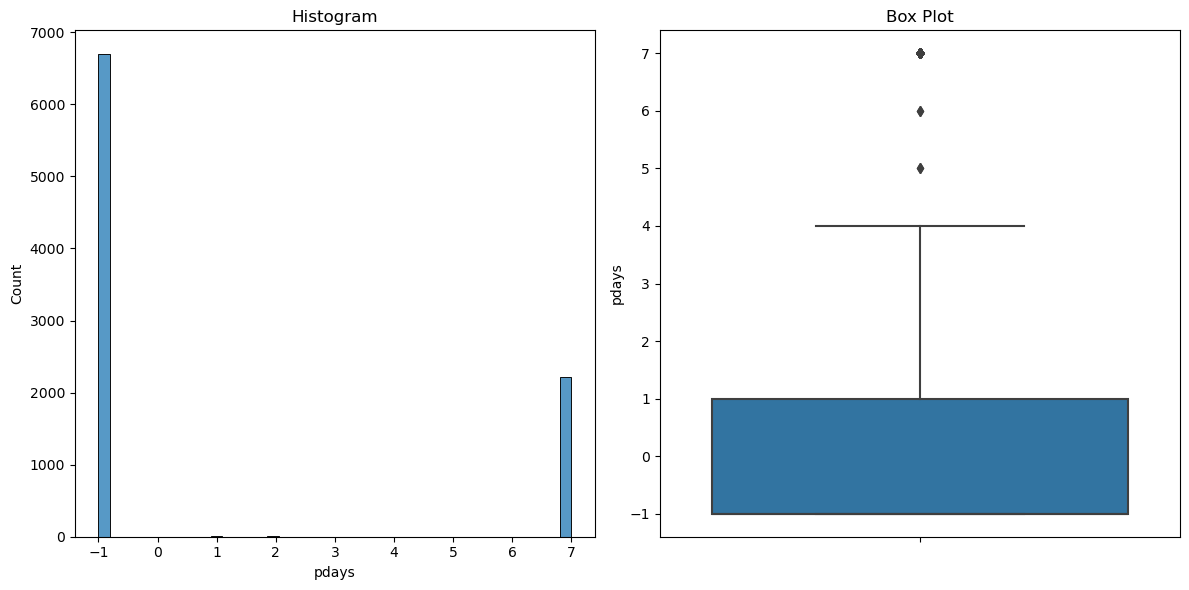

previous - Before Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



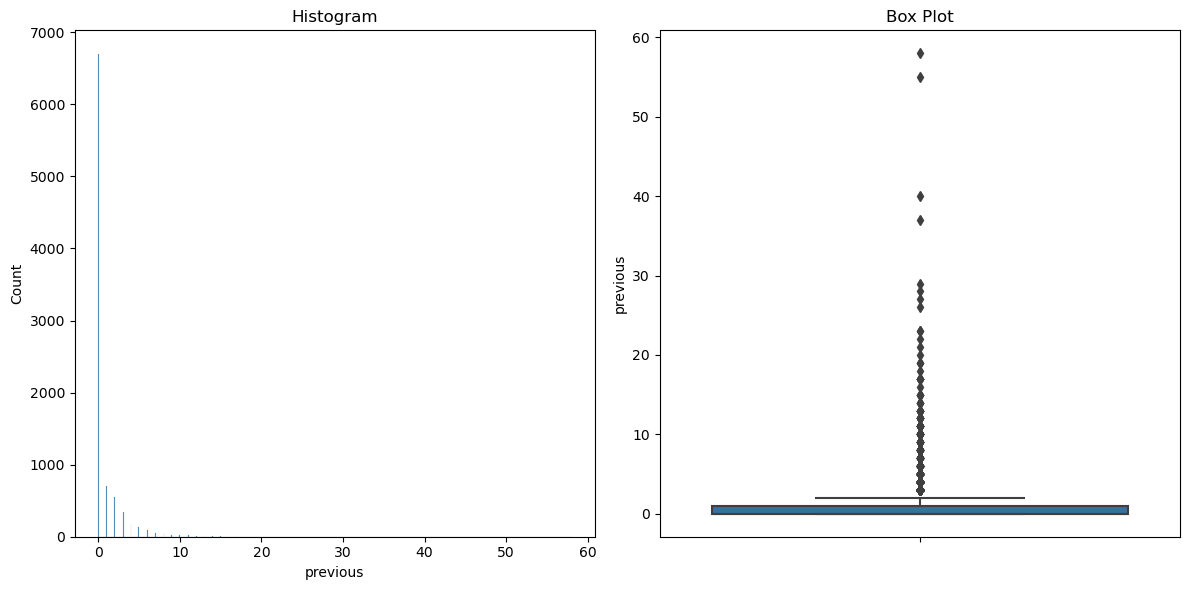


 previous - After Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



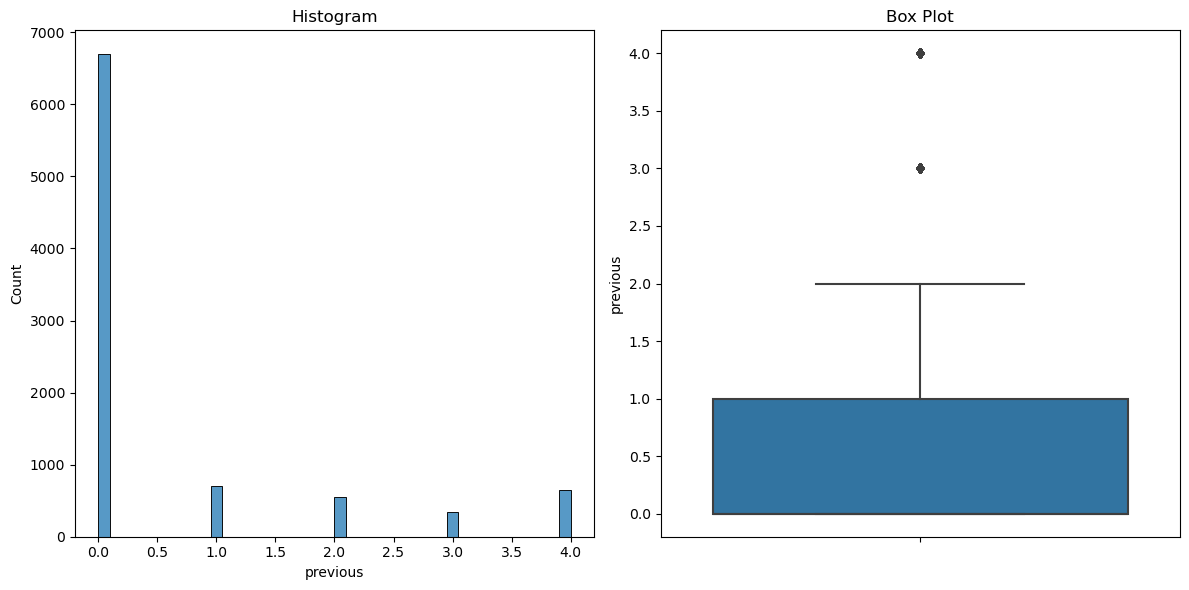

In [48]:
# Check the distribution before and after capping
def diagnostic_plots(df, feature):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with two subplots

    # Histogram
    sns.histplot(df[feature], ax=axes[0])
    axes[0].set_title('Histogram')

    # Box plot
    sns.boxplot(y=df[feature], ax=axes[1])
    axes[1].set_title('Box Plot')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
      
# memanggil masing - masing 
print('balance - Before Capping')
diagnostic_plots(X_train, 'balance')

print('\n balance - After Capping')
diagnostic_plots(X_train_capped, 'balance')

print('duration - Before Capping')
diagnostic_plots(X_train, 'duration')

print('\n duration - After Capping')
diagnostic_plots(X_train_capped, 'duration')

print('campaign - Before Capping')
diagnostic_plots(X_train, 'campaign')

print('\n campaign - After Capping')
diagnostic_plots(X_train_capped, 'campaign')

print('pdays - Before Capping')
diagnostic_plots(X_train, 'pdays')

print('\n pdays - After Capping')
diagnostic_plots(X_train_capped, 'pdays')

print('previous - Before Capping')
diagnostic_plots(X_train, 'previous')

print('\n previous - After Capping')
diagnostic_plots(X_train_capped, 'previous')

In [49]:
# membuat fungsi def outliers normal
def drop_outliers_normal(X_train_capped, normal):
    for col in normal:
        avg = X_train_capped[col].mean()
        std = X_train_capped[col].std()
        upper_limit =  avg + 3 * std
        lower_limit = avg - 3 * std
        X_train_capped.drop(X_train_capped[(X_train_capped[col] > upper_limit) | (X_train_capped[col] < lower_limit)].index, inplace=True)
# membuat fungsi def outlier skewd
def drop_outliers_skewed(X_train_capped, skew):
    for col in skew:
        iqr = 1.5 * (np.percentile(X_train_capped[col], 75) - np.percentile(X_train_capped[col], 25))
        upper_limit = np.percentile(X_train_capped[col], 75) + iqr
        lower_limit = np.percentile(X_train_capped[col], 25) - iqr
        X_train_capped.drop(X_train_capped[(X_train_capped[col] > upper_limit) | (X_train_capped[col] < lower_limit)].index, inplace=True)

In [50]:
# melakukan drop outlier untuk baris normal
drop_outliers_normal(X_train_capped, ['day'])

drop_outliers_skewed(X_train_capped, ['age'])

In [51]:
# penyesuaian
y_train = y_train.loc[X_train_capped.index]

In [52]:
# check bentuk data 
print (X_train_capped.shape)
print (y_train.shape)

(8794, 16)
(8794,)


Hasil **Observasi** : 

- hasil dilakukan identifikasi data `normal`,`skew`,dan `extreme` `skew`
- handle `extreme` `skew` menggunakan `winsorizer`
- memastikan adanya perubahan dengan melihat histogram, dan boxplot
- handle data outlier **normal**, **skew** 
- melakukan **drop** pada kedua data outlier
- pengecheckan bentuk data

dari hasil data bahwa setelah melakukan `capping` pada data `outlier` `extreme`, serta **drop** hanya berkurang sebesar **135**. Masih dalam batas toleransi tidak melebihi **5%** keseluruhan data.


### 5.5 Feature Selection

Tahap ini saya melakukan `Feature Selection` dengan data yang telah dihandle, membuat fungsi untuk menentukan nilai korelasi pada setiap kolom.

In [53]:
# Menggabungkan data pelatihan (fitur dari set_1 dan target)
combined_train_data = pd.concat([X_train_capped, y_train], axis=1)
phik_combine = combined_train_data.phik_matrix()
phik_combine['deposit']

interval columns not set, guessing: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


age          0.248434
job          0.216102
marital      0.066277
education    0.172917
default      0.061163
balance      0.178710
housing      0.311718
loan         0.171091
contact      0.153849
day          0.149337
month        0.389947
duration     0.661047
campaign     0.142378
pdays        0.209813
previous     0.182860
poutcome     0.440849
deposit      1.000000
Name: deposit, dtype: float64

In [54]:
# mengambil korelasi dengan standar treshold diatas 0.3

phik_combine['deposit']

features = []
for i in X_train_capped.columns.tolist():
    if phik_combine['deposit'][i]>0.3:
        features.append(i)
        
features

['housing', 'month', 'duration', 'poutcome']

In [55]:
# variable baru untuk dimasukan ke X_train
X_train_features = X_train_capped[features]
X_test_features = X_test_capped[features]

In [56]:
# menunjukan hasil data
X_train_features

,housing,month,duration,poutcome
3299,yes,mar,456,success
2273,no,jun,282,failure
4191,yes,jun,541,unknown
4718,no,may,131,unknown
4001,yes,sep,305,failure
...,...,...,...,...
10992,no,aug,211,unknown
9529,no,apr,206,unknown
406,no,jul,426,unknown
2191,no,jun,314,unknown


In [57]:
# menampilkan bentuk data 
print(X_train_features.shape)
print(y_train.shape)

(8794, 4)
(8794,)


### 5.6 Split Numerical dan Categorical

In [58]:
# melakukan split numeric dan categoric
num_col = X_train_features.select_dtypes(include=np.number).columns.tolist()
cat_col = X_test_features.select_dtypes(include=['object']).columns.tolist()

print(f'numerical column:{num_col}')
print(f'categorical columns:{cat_col}')

numerical column:['duration']
categorical columns:['housing', 'month', 'poutcome']


In [59]:
# split train test base on column types

X_train_num = X_train_features[num_col]
X_test_num = X_test_features[num_col]

X_train_cat = X_train_features[cat_col]
X_test_cat = X_test_features[cat_col]

X_train_num.head()

,duration
3299,456
2273,282
4191,541
4718,131
4001,305


### 5.7 Check Cardinality

In [60]:
# menetapkan fungsi
for column in X_train_num.columns:
    if df[column].dtype == 'object':  # Filter hanya kolom kategori
        cardinality = df[column].nunique()  # Hitung jumlah nilai unik
        print(f"Cardinality of {column}: {cardinality}")


for column in X_train_cat.columns:
    if df[column].dtype == 'object':  # Filter hanya kolom kategori
        cardinality = df[column].nunique()  # Hitung jumlah nilai unik
        print(f"Cardinality of {column}: {cardinality}")

Cardinality of housing: 2
Cardinality of month: 12
Cardinality of poutcome: 4


In [61]:
# menampilkan data 
print(X_train_num)
print(X_train_cat)

       duration
3299        456
2273        282
4191        541
4718        131
4001        305
...         ...
10992       211
9529        206
406         426
2191        314
10863       158

[8794 rows x 1 columns]
      housing month poutcome
3299      yes   mar  success
2273       no   jun  failure
4191      yes   jun  unknown
4718       no   may  unknown
4001      yes   sep  failure
...       ...   ...      ...
10992      no   aug  unknown
9529       no   apr  unknown
406        no   jul  unknown
2191       no   jun  unknown
10863     yes   may  failure

[8794 rows x 3 columns]


Hasil observasi : 

- keseluruhan data tidak dalam bentuk `numeric`, maka saya melakukan split numerical dan categorical namun hanya ingin melakukan pengecheckan cardinality. 
- pada saat melakukan split `numerical` , dan `categorical` bahwa diketahui hasil fitur **numerical** adalah `duration`, 
- sedangkan **categorical** terpilih `housing`, `month`, dan `poutcome`
- fitur yang dipilih berdasarkan perhitungan **korelasi** dengan sebagai standartnya adalah **0.3**, pemisahaan `numerical`, dan ``categorical`` berdasarkan data yaitu **object**, dan **numberic**.
- pada saat melakukan proses `modeling pipeline` saya akan menggunakan variabel `X_features` data yang sudah sepenuhnya dihandle, 
- hasil dari `check cardinality` menunjukan untuk kolom `housing`, `month`, dan `poutcome` berjumlah sebesar **2**,**12**,dan **4**.

### 5.8 Modeling Pipeline

saya menggunakan `modeling pipeline`, dengan data yang diberikan. Tujuan untuk memudahkan dalam melakukan proses data tanpa harus melakukan `scaling` dan `encoding`. 

hal yang saya lakukan adalah : 

- menggunakan scaling `MinMaxScaler` dengan sebaran data saya tidak **normal**, namun mayoritas pada `extreme skew`. 
- menggunakan `OneHotEncoder` dikarenakan bentuk data **objek**, kemungkinan tidak ada hubungan ordinal data.

In [62]:
# feature scaling dan encoding 

scaler = MinMaxScaler()
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False) # catatan : sparse_output pengganti .toarray()


preprocess = ColumnTransformer(
    transformers=[
        ('num',scaler,num_col),
        ('cat',encoder,cat_col)
    ],
    remainder = 'passthrough' # untuk categorical encoded columns agar tidak ditransformasi. 
)

## 6.Model Definition

Tahap ini saya menggunakan beberapa model algorithma yaitu :

 `SVC`,`DecisionTreeClassifier`,`RandomForestClassifier`,`KNeighborsClassifier`,AdaBoostClass`ifier. Saya menambahkan model baru yaitu `GradientBoostingClassifier`,dan `CatBoostClassifier` dengan ekspetasi model tersebut sesuai dengan kebutuhan data. Hasil terbaik akan dipilih menjadi best model untuk melakukan pengoperasian selanjutnya.

In [63]:
# model pipeline untuk setiap model 

model_svc = make_pipeline(preprocess, SVC())
model_dt = make_pipeline(preprocess, DecisionTreeClassifier(random_state=17))
model_rf = make_pipeline(preprocess, RandomForestClassifier(random_state=17))
model_knn = make_pipeline(preprocess, KNeighborsClassifier())
model_ada = make_pipeline(preprocess, AdaBoostClassifier())
model_graBoost = make_pipeline(preprocess, GradientBoostingClassifier())
model_Cat = make_pipeline(preprocess, CatBoostClassifier())


In [64]:
model_Cat.steps

[('columntransformer',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('num', MinMaxScaler(), ['duration']),
                                  ('cat',
                                   OneHotEncoder(handle_unknown='ignore',
                                                 sparse_output=False),
                                   ['housing', 'month', 'poutcome'])])),
 ('catboostclassifier', <catboost.core.CatBoostClassifier at 0x1769df1c6d0>)]

## 7.Model Training

In [65]:
skfold = StratifiedKFold(n_splits=3)

In [66]:
# membuat cross val untuk setiap model_pipeline

cv_svc = cross_val_score(model_svc, X_train_features, y_train, cv=3,scoring='accuracy',n_jobs=-1)
cv_dt = cross_val_score(model_dt, X_train_features, y_train, cv=3,scoring='accuracy',n_jobs=-1)
cv_rf = cross_val_score(model_rf, X_train_features, y_train, cv=3,scoring='accuracy',n_jobs=-1)
cv_knn = cross_val_score(model_knn, X_train_features, y_train, cv=3,scoring='accuracy',n_jobs=-1)
cv_ada = cross_val_score(model_ada, X_train_features, y_train, cv=3,scoring='accuracy',n_jobs=-1)
cv_graBoost = cross_val_score(model_graBoost, X_train_features, y_train, cv=3,scoring='accuracy',n_jobs=-1)
cv_Cat = cross_val_score(model_Cat, X_train_features, y_train, cv=3,scoring='accuracy',n_jobs=-1)

## 8.Model Evaluation

mencari best model dengan cross_val_score(mean)

In [67]:
# mencari best model berdasarkan Cross_val_score (mean)

name_model = []
cv_score = 0
for cv,name in zip([cv_svc,cv_dt,cv_rf,cv_knn,cv_ada,cv_graBoost,cv_Cat],
                   ['svc','dt','rf','knn','ada','graBoost','Cat']):
    print(name)
    print('accuracy score - all - cross validation', cv)
    print('accuracy score - mean - cross validation', cv.mean())
    print('accuracy score - std - cross validation', cv.std())
    print('accuracy score - range - cross validation', (cv.mean()- cv.std()), '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()> cv_score:
        cv_score = cv.mean()
        name_model = name 
    else : 
        pass
    
print('Best Model:', name_model)
print('cross val mean from best model :', cv_score)

svc
accuracy score - all - cross validation [0.8212824  0.82531559 0.81166837]
accuracy score - mean - cross validation 0.8194221218695449
accuracy score - std - cross validation 0.0057246326393026025
accuracy score - range - cross validation 0.8136974892302423 - 0.8251467545088474
--------------------------------------------------
dt
accuracy score - all - cross validation [0.7633015  0.77550324 0.75230297]
accuracy score - mean - cross validation 0.7637025700556487
accuracy score - std - cross validation 0.009475716636234022
accuracy score - range - cross validation 0.7542268534194146 - 0.7731782866918827
--------------------------------------------------
rf
accuracy score - all - cross validation [0.76671214 0.78642102 0.76287956]
accuracy score - mean - cross validation 0.7720042406298324
accuracy score - std - cross validation 0.010313574848974506
accuracy score - range - cross validation 0.7616906657808579 - 0.782317815478807
--------------------------------------------------
knn

best model ditemukan, dengan model terbaik adalah `catboostclassifier` dengan cross val mean nya adalah `0.8241`

CatboostClassifier

In [68]:
# membentuk pipe catboost
model_Cat.fit(X_train_features,y_train)

Learning rate set to 0.026068
0:	learn: 0.6789438	total: 166ms	remaining: 2m 45s
1:	learn: 0.6661561	total: 182ms	remaining: 1m 30s
2:	learn: 0.6536111	total: 197ms	remaining: 1m 5s
3:	learn: 0.6405110	total: 206ms	remaining: 51.3s
4:	learn: 0.6293355	total: 212ms	remaining: 42.3s
5:	learn: 0.6181400	total: 218ms	remaining: 36.1s
6:	learn: 0.6093791	total: 222ms	remaining: 31.5s
7:	learn: 0.5996720	total: 226ms	remaining: 28s
8:	learn: 0.5904615	total: 230ms	remaining: 25.3s
9:	learn: 0.5822271	total: 236ms	remaining: 23.3s
10:	learn: 0.5728416	total: 241ms	remaining: 21.7s
11:	learn: 0.5651409	total: 246ms	remaining: 20.2s
12:	learn: 0.5575630	total: 250ms	remaining: 19s
13:	learn: 0.5501854	total: 254ms	remaining: 17.9s
14:	learn: 0.5441006	total: 259ms	remaining: 17s
15:	learn: 0.5382265	total: 263ms	remaining: 16.2s
16:	learn: 0.5328175	total: 267ms	remaining: 15.4s
17:	learn: 0.5268655	total: 272ms	remaining: 14.8s
18:	learn: 0.5222665	total: 275ms	remaining: 14.2s
19:	learn: 0.51

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['duration']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['housing', 'month',
                                                   'poutcome'])])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x000001769DF1C6D0>)])

In [69]:
# model prediksi sebelum tuning

# lakukan prediksi data sebelum melakukan tuning
y_pred_train = model_Cat.predict(X_train_features)
y_pred_test = model_Cat.predict(X_test_features)

# menampilkan hasil print data sebelum dituning
print("accuracy Score - Train Set:")
print (accuracy_score(y_train,y_pred_train))
print("accuracy Score - Test Set:")
print (accuracy_score(y_test,y_pred_test))

accuracy Score - Train Set:
0.8485330907436889
accuracy Score - Test Set:
0.8325123152709359


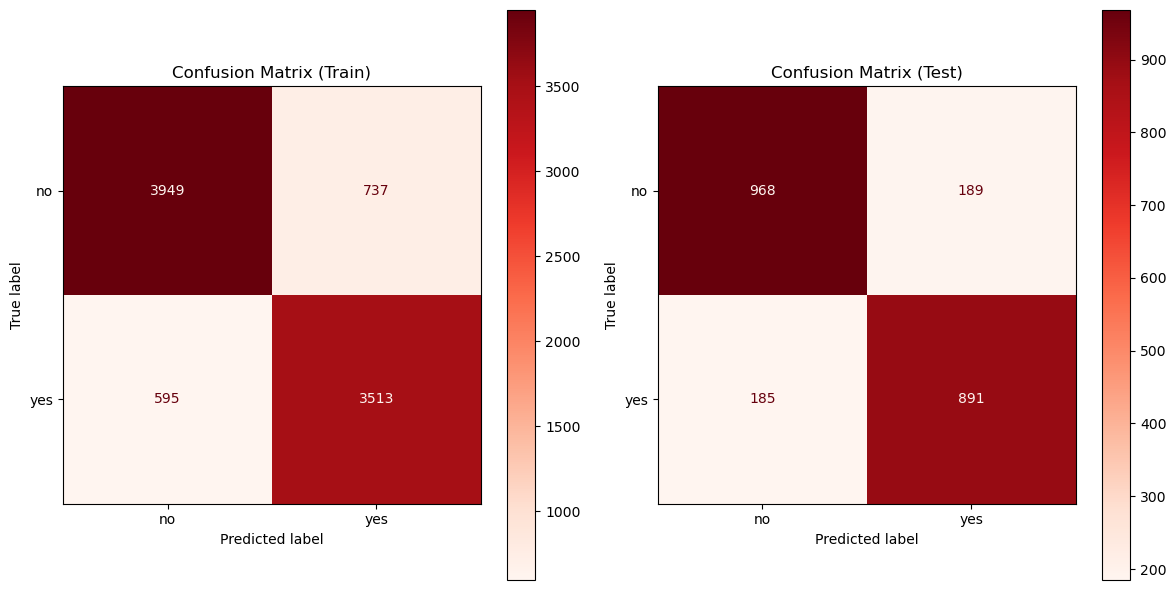

In [70]:
# membuat chart dengan subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix untuk training data
disp_train = ConfusionMatrixDisplay.from_estimator(model_Cat, X_train_features, y_train, cmap='Reds', ax=axes[0])
disp_train.ax_.set_title('Confusion Matrix (Train)')

# Plot confusion matrix untuk testing data
disp_test = ConfusionMatrixDisplay.from_estimator(model_Cat, X_test_features, y_test, cmap='Reds', ax=axes[1])
disp_test.ax_.set_title('Confusion Matrix (Test)')

# menentukan posisi lay out
plt.tight_layout()
plt.show()

Hyperparameter Tuning

In [71]:
# melakukan HT dengan grid search

# classifier_cat = CatBoostClassifier(random_seed=17) # dalam bentuk data sudah discaling dan encode

param_grid = {'catboostclassifier__learning_rate': [0.01, 0.05, 0.1],
            'catboostclassifier__depth': [4, 6, 8, 10],
            'catboostclassifier__l2_leaf_reg': [1, 3, 5, 7, 9],
            'catboostclassifier__iterations': [100],
            'catboostclassifier__boosting_type':['Ordered','Plain'] 
            }

grid_cat = GridSearchCV(model_Cat, param_grid=param_grid,cv=3,scoring='accuracy')
grid_cat.fit(X_train_features, y_train)

cat_terbaik = grid_cat.best_estimator_

# # Lakukan prediksi pada data pelatihan dan data uji
y_pred_train_cat = cat_terbaik.predict(X_train_features)

# # Lakukan prediksi pada data pelatihan dan data uji
y_pred_test_cat = cat_terbaik.predict(X_test_features)



0:	learn: 0.6895087	total: 17.7ms	remaining: 1.75s
1:	learn: 0.6859089	total: 20.5ms	remaining: 1s
2:	learn: 0.6823814	total: 23.2ms	remaining: 751ms
3:	learn: 0.6789340	total: 26.3ms	remaining: 631ms
4:	learn: 0.6754692	total: 29.3ms	remaining: 556ms
5:	learn: 0.6722602	total: 32.9ms	remaining: 515ms
6:	learn: 0.6690081	total: 36.4ms	remaining: 483ms
7:	learn: 0.6659674	total: 39.5ms	remaining: 454ms
8:	learn: 0.6631198	total: 42.4ms	remaining: 429ms
9:	learn: 0.6599391	total: 45.5ms	remaining: 410ms
10:	learn: 0.6569515	total: 48.3ms	remaining: 391ms
11:	learn: 0.6539914	total: 51.5ms	remaining: 378ms
12:	learn: 0.6511339	total: 54.4ms	remaining: 364ms
13:	learn: 0.6481871	total: 57.6ms	remaining: 354ms
14:	learn: 0.6452827	total: 60.6ms	remaining: 344ms
15:	learn: 0.6425727	total: 63.8ms	remaining: 335ms
16:	learn: 0.6398184	total: 66.6ms	remaining: 325ms
17:	learn: 0.6372663	total: 69.3ms	remaining: 315ms
18:	learn: 0.6346429	total: 72.4ms	remaining: 309ms
19:	learn: 0.6321380	tota

In [72]:
# Tampilkan classification report untuk data pelatihan
print("accuracy - Train Set:")
print(accuracy_score(y_train, y_pred_train_cat))

# Tampilkan classification report untuk data uji
print("accuracy - Test Set:")
print(accuracy_score(y_test, y_pred_test_cat))

accuracy - Train Set:
0.8345462815556061
accuracy - Test Set:
0.8356471115091805


In [73]:
# membuat variabel baru 
y_pred_train_best = grid_cat.predict(X_train_features)
y_pred_test_best = grid_cat.predict(X_test_features)

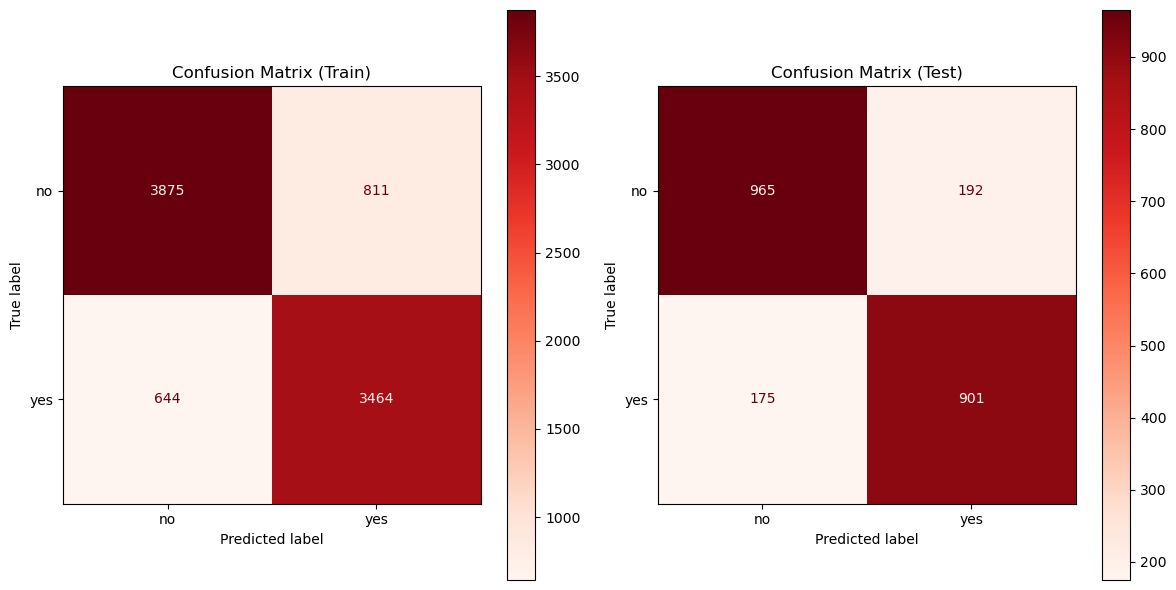

In [74]:
# membuat chart dengan subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix untuk training data
disp_train = ConfusionMatrixDisplay.from_estimator(cat_terbaik, X_train_features, y_train, cmap='Reds', ax=axes[0])
disp_train.ax_.set_title('Confusion Matrix (Train)')

# Plot confusion matrix untuk testing data
disp_test = ConfusionMatrixDisplay.from_estimator(cat_terbaik, X_test_features, y_test, cmap='Reds', ax=axes[1])
disp_test.ax_.set_title('Confusion Matrix (Test)')

# menentukan posisi lay out
plt.tight_layout()
plt.show()

In [75]:

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # Calculate recall scores
    score_reports = {
        'accuracy Train Set': accuracy_score(y_train, y_pred_train),
        'accuracy Test Set': accuracy_score(y_test, y_pred_test),
    }
    all_reports[name] = score_reports
    return all_reports

all_reports = {}
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline')
all_reports = performance_report(all_reports, y_train, y_pred_train_cat, y_test,y_pred_test_cat, "Grid Search")

df_all_reports = pd.DataFrame(all_reports)

In [76]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train_cat, y_test, y_pred_test_cat, 'Grid Search')
pd.DataFrame(all_reports)

,Baseline,Grid Search
accuracy Train Set,0.848533,0.834546
accuracy Test Set,0.832512,0.835647


**Hasil Observasi** : 

- Hasil Observasi menunjukan ketentuan `Train Set`, dan `Test Set` nilai sebelum dituning sebesar **0.8485**, dan **0.8325**. kondisi data tersebut menjadi `goodfit`
- Setelah itu melakukan proses tunning `Train Set`, dan `Test Set` nilai menjadi **0.8345**, dan    **0.8356**. kondisi data tersebut menjadi `goodfit`
- hasil dari kedua dapat dilihat dari train terjadi penurunan sebesar **0.01**, tetapi untuk data test set terjadi peningkatan sebesar **0.003**. Hal ini dapat saya simpulkan proses tuning meningkat.

Selanjutnya melakukan identifikasi analisis dengan **Confusion Matrix**

**Observasi** : 

- Hasil yang ditemukan bahwa Confusion Matrix **sebelum** di *Tunning* 

- Confusion Matrix (Train)         

|    **TP**    |    **FP**    | 
|--------------|--------------|
|     3949     |     737      |
|    **FN**    |    **TN**    |
|     595      |     3513     |

- Confusion Matrix (Test)

|    **TP**    |    **FP**    | 
|--------------|--------------|
|     968      |     189      |
|    **FN**    |    **TN**    |
|     185      |     891      |

- Hasil yang ditemukan bahwa Confusion Matrix **setelah** di *Tunning* 

- Confusion Matrix (Train)         

|    **TP**    |    **FP**    | 
|--------------|--------------|
|     3875     |     811      |
|    **FN**    |    **TN**    |
|     644      |     3464     |

- Confusion Matrix (Test)

|    **TP**    |    **FP**    | 
|--------------|--------------|
|     965      |     192      |
|    **FN**    |    **TN**    |
|     175      |     901      |







**Hasil** :

- Hasil `Confusion Matrix` menunjukan dengan melihat prediksi test. Hasil yang diperhatikan adalah nilai **TP**, **TN**, **FP**, dan **FN**
- Hasil menunjukan adanya perubahan yaitu terjadi penurunan pada **TP**, tapi peningkatan pada **TN** pada score test
- sedangkan nilai **FN** juga mengalami penurunan, dan ada peningkatan pada **FP**. 

Hasil tersebut memberikan asumsi bahwa, model `CatBoostClassifier` saat `Hyperparameter tuning` terjadi, memiliki tujuan untuk melakukan **optimisasi** terhadap model. 


## 9.Model Saving

In [77]:
# save the files ! 
with open('model_Cat.pkl', 'wb') as file_1 : # wb = write binary
    pickle.dump(model_Cat,file_1)
    
with open('cat_terbaik.pkl', 'wb') as file_2 : # wb = write binary
    pickle.dump(cat_terbaik,file_2)

## 10.Model Inference

Penjelasan model ada dinote inference

## 11.Pengambilan Kesimpulan

Kesimpulan dalam hasil analisis EDA : 

1. **Data Pekerjaan, Pernikahaan, dan Umur** : 
- sebaran data, bahwa mayoritas pensiun lebih banyak, dibagi menjadi tiga, `menikah`, `single`, dan `cerai`. Diketahui rata - rata umurnya adalah **66**,**65**, dan **58**. 
- sedangkan, data terendah pada murid, diketahui rata - rata umurnya dari `menikah`, `single`, dan `cerai` yaitu : **37**,**31**, dan **25**
- [x] mayoritas nasabah ternyata banyak pensiunan, dan rata - rata umur 58 - 66. Serta, single dan divorced lebih cenderung akan berlangganan pada deposito, dikarenakan status single yang masih sekolah dan yang divorced.
- [x] dapat diasumsikan nasabah atau klien yang masih sekolah, orang tua sudah menyiapkan tabungan deposito jangka panjang dari kecil. *Passive Income* bisa menjadi biaya/kebutuhan anak-anak orang tua.
- [x] hal yang sama terhadap pensiunan, mereka melakukan deposito jangka panjang sebagai pemasukan jangka panjang. 


2. **Data Klasifikasi** :
- Keseluruhan data dilakukan klasifikasi dan ditemukan bahwa ada tiga kelas umur yaitu : `Dewasa`, `Lansia`, `Remaja` 
- Mayoritas bar chart menunjukan `Dewasa` sebagai nasabah terbanyak, `Lansia`, dan `Remaja`. 
- [x] mayoritas umur dewasa yang menjadi nasabah, hal ini memiliki asumsi bahwa orang dewasa masih memiliki aktif income, sedangkan lansia dominasi kedua dengan passive income. Sedangkan untuk remaja sendiri kita memiliki asumsi bahwa, orang tua mendaftarkan anaknya dengan tujuan "simpanan masa depan".

3. **Klasifikasi Umur, Pekerjaan terhadap Saldo** :
- dalam klasifikasi usia diketahui Lansia memiliki rata - rata saldo tertinggi, dibandingkan Dewasa, dan Remaja
- untuk pekerjaan ditemukan nasabah pensiunan memiliki saldo tertinggi rata - rata sebesar 2000 - 2500, serta rata - rata saldo terendah adalah pekerjaan services. 

4. **Grafik Pernikahan, Sebaran Pendidikan, Kontak** :
- jumlah nasabah yang `menikah` lebih dari **6000**, dan `single` antara **3000** - **4000**, dan yang `bercerai` antara **1000**. 
- dalam sebaran menunjukan mayoritas data pendidikan berurut dari secondary, tertiary, primary, dan unknown.
- Sebaran Kontak menunjukan mayoritas menggunakan cellular dan telephone, serta beberapa belum diketahui. 
- [x] Diketahui hampir keseluruhan nasabah sudah menjadi nasabah, hal ini disimpulkan masyarakat sudah mengenal bank untuk tempat menyimpan tabungan, 
- [x] dan untuk sekarang mayoritas masyarakat memiliki cellular dibandingkan telephone. Perkembangan trend dalam melakukan komunikasi harusnya menjadi lebih mudah, apabila ingin menghubungin calon nasabah yang belum melakukan deposito. 

5. **Balance dan Umur** :
- Sebaran menggunakan scatter plot menunjukan mayoritas saldo `10000`, dan umur `74`
- dengan umur tertinggi diumur `95` `pensiunan` saldonya sebesar `2282`,
- saldo terbanyak sebesar `81000`, pensiunan dan umur `84`
- dan ada saldo menyampai **minus** pada umur `49`, pekerjaan `manajement`. 
- [x] diketahui pada umumnya mayoritas klien nasabah sudah pasti memiliki saldo dibank nya. Hal ini menunjukan berapapun umurnya, memiliki sebuah tabungan sudah menjadi kebiasaan. 

6. **Perbanding Hutang, dan Cicilan Rumah** :
- dalam dua grafik menunjukan mayoritas tidak memiliki hutang, dan cicilan rumah
- mayoritas nasabah memiliki hutang dan cicilan disekitaran 40000 - 50000. 
- walaupun nasabah memiliki saldo tinggi, belum tentu ada yang melakukan cicilan, atau hutang pribadi. 
- [x] rata - rata yang memiliki cicilan, atau hutang saldo yang dimiliki tidak lebih dari 50000, menimbulkan sebuah asumsi uang yang dimiliki sudah disisihkan untuk cicilan dan hutang.


7. **Sebaran Deposit** :
- Distribusi deposit terbagi rata dengan ditanya melakukan deposit sebesar **47%**, dan tidak sebenyak **52.6%**



### Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
2. Jelaskan perbedaan cara kerja Random forest dengan algoritma boosting yang  anda pilih ! 
3. Jelaskan apa yang dimaksud dengan Cross Validation!
---

1. latar belakang bagging adalah sebuah metode yang memiliki tujuan untuk memperbaiki hasil algoritma terutama classification dan regresion dengan penggabungkan klasifikasi dari beberapa model. 
Cara kerja sama seperti model decision tree, namun model yang dibentuk sebanyak model yang ingin digunakan. model yang dibangun dari data sample dengan melakukan pengembalian pada data training. Proses tersebut diulang sehingga menemukan hasil terbaik. 

2. perbedaan **RandomForest** : 
- random forest seperti model decision tree, berarti melakukan perhitungan data dengan melakukan split data, sehingga menemukan hasil terbaik. Memiliki tujuan untuk meningkatkan performance secara keseluruhan. 
- randomforest menggunakan sample bootstrapped dalam training data atau yang kita kenal sebagai bagging.
- prediksi yang dilakukan adalah setiap cabang atau data split dimiliki, memiliki nilai prediksi tersendiri. Hasil akan berhenti ketika mencapai batas yang telah ditentukan. Cenderung data akan menghasil 'overfit', atau yang kita kenal data bias.
- namun untuk randomforest dapat menghandle overfitting, bisa mengoptimalkan jumlah data besar.

**CatBoostClassifier** : 
- memiliki kompatible data terhadap categorical, terutama apabila target prediksi adalah objektif(categorical).
- sama seperti randomforest menggunakan decision tree, begitu juga dengan catboost. 
- dalam handling feature catboost bisa menghandling categoring tanpa harus melakukan preprocessing, namun pada kasus data yang diolah oleh saya. saya tetap melakukan preprocessing seperti encoding dan scaling melalui pipeline. Tujuan untuk memudahkan dalam membentuk format code, dan memastikan kembali bentuk data sudah sesuai seperti saya inginkan. 
- catboost juga menggunakan boosting seperti gradient
- prediksi dari catboost memiliki asummsi dan melakukan penggabungan untuk mendapatkan hasil prediksi final.
- keuntungan dari catboost mampu menghandle data categoric, sangat memiliki pengaruh kuat, dan efficieny dalam operasi data jumlah besar. 



Hasil evaluasi metric

- ```Accuracy``` : dengan melihat target y nya adalah balance, accuracy metric yang tepat dalam melakukan prediksi. apabila hasil tuning accuracy sebesar 83%, maka prediksi memiliki akurasi sebesar 83% dalam melakukan prediksi. Pada kasus ini akan melihat apakah nasabah menjawab iya atau tidak. 
 - ```Precision``` : perhitungan dilakukan dan ditemukan hasil nya nan, dan tidak bisa diolah. Namun. ekspetasi nya melakukan fokus terhadap berapa banyak calon/ customer untuk diprediksi dan melakukan langganan. 
 - ```Recall``` : sama dengan situasi recall, accuracy, dan precisiion. melakukan prediksi dengan data jawaban yes, dengan memastikan kustomer yang berpotensial.
 - ```F1 Score``` : metric data dengan tujuan meningkatkan nilai recall, dan precision.

### Kelebihan dan Kekurangan

In [78]:
X_train_features.head(10)

,housing,month,duration,poutcome
3299,yes,mar,456,success
2273,no,jun,282,failure
4191,yes,jun,541,unknown
4718,no,may,131,unknown
4001,yes,sep,305,failure
8439,no,may,277,unknown
4083,no,oct,238,failure
280,no,jun,1199,unknown
10395,no,jul,317,unknown
5080,yes,may,338,unknown


Kelebihan

- menggunakan catboost banyak kelebihan yang dirasakan salah satunya dalam melakukan proses data. 
- data bisa melakukan proses secara langsung walaupun banyak bentuk data dalam bentuk categorical, jadi melakukan penghematan waktu tanpa harus di preprocessing secara manual. Namun,
- pada kasus ini saya tetap melakukan preprocessing dengan harapan data tidak bermasalah dalam melakukan proses perhitungan algorithma
- catboost juga memiliki feature auto scaling, hal ini memudahkan analisis apabila data yang dimiliki berbeda
- catboost memiliki boosting untuk membantu melakukan perhitungan, apabila ada model decision tree yang error makan akan dibantu 
- perhitungan model catboost juga bisa menghindari overfitt dengan menregulasi secara otomatis 

Kekurangan 

- yang saya rasakan dalam menggunakan model tersebut, pada saat menerapkan Hyperparameter tuning pada catboost, perhitungan yang dilakukan sangat lama dengan metode gridsearch. Yaitu model menghitung keseluruhan data
- hal tersebut yang menjadi asumsi tambahan, bahwa catboost bisa sensitive terhadap hyperparameter. maka, perlu ditentukan parameter nya secara manual, dan mencari kombinasi yang sesuatu untuk catboost sendiri.
- dalam interpretasi untuk data yang normal, model masih bisa melakukan interpretasi. namun, akan sulit apabila pada bentuk data dengan hasil yang complex. hal tersebut akan menjadi tantangan untuk menginterpretasi. contoh bentuk data kesehatan, atau prediksi penyakit dan jantung.

### Improvement Statement

Improvement pada model tidak banyak dilakukan. namun, `preprocessing` sangatlah penting seperti `handling outlier`, `missing values`, dan `feature selection`. Hal lainnya mengetahui bentuk model data yang diproses akan membantu dalam pembuatan machine learning. Melakukan `MLOps` dengan terus mengupdate data, dan monitoring dapat membantu performa machine learning sendiri. Apabila model dapat digunakan untuk hasil lapangan, maka bisa mengadaptasi situasi dan kondisi.

### Overal Insight

Proses yang dilakukan bahwa data yang didapat sudah sesuai dengan kriteria, target data balance, dan sederhananya tujuan dalam pemahaman data. Penggunaan model seperti catboost membantu memudahkan proses perhitungan algorithma. Namun, memperhatikan parameter tuning bisa lebih diperhatikan, serta memiliki asumsi apabila data imbalance, atau banyaknya missing value pada fungsi dapat membantu proses perhitungan.